# Temperatur Forcasting using Linear Regression

### AR (Autoregression)

Autoregression, or AR, is a method for predicting future values by looking at **past values**. Think of it like this: 

> *If you know how the weather behaved over the past few days, you can make a good guess about tomorrow's weather.*

---

### Breaking It Down Step-by-Step

1. **Time Series**: 
   A sequence of numbers measured over time. For example:
   - Temperatures over a week: `[20, 21, 19, 18, 20, 22, ?]`.

2. **The Idea**:
   To predict the next value (e.g., tomorrow’s temperature), we look at previous days' temperatures and find a relationship between them.

3. **How It Works**:
   - Suppose tomorrow’s temperature depends on the past few days. You can write it as:
   
     $\text{Tomorrow's Temp} = \text{(Today's Temp)} \times (\text{some weight}) + \text{(Yesterday's Temp)} \times (\text{another weight}) + \dots$
   - This formula combines past values (lags) with their weights to calculate the future value.

---

### An Example

Imagine you’re predicting tomorrow’s temperature:

#### Data:
   ```
            Day                | Temperature
   ----------------------------|------------
   Day 1 (Day Before Yesterday)| 20
   Day 2 (Yesterday)           | 21
   Day 3 (Today)               | 19
   Day 4 (Tomorrow)            | ?
   ```

#### Using Past Values (AR with 2 lags):
   - **Today's Temp (lag_1)**: 19
   - **Yesterday's Temp (lag_2)**: 21
   - A simple formula might look like:
     $\text{Tomorrow's Temp} = (19 \times 0.7) + (21 \times 0.3)$
   - This gives a prediction: $ \text{Temp} = 19.6 $.

---

### How AR is Applied in the Code

1. **Lagged Features**:
   - Create columns for past values (`lag_1`, `lag_2`, etc.).
2. **Fit a Model**:
   - Use **Linear Regression** to learn how past temperatures affect the future temperature (the weights).
3. **Make Predictions**:
   - Use the learned relationship to predict future values.

---

### Key Takeaway

Autoregression is like using a **memory** of past values to predict the future. If a time series shows patterns over time, AR can help uncover and use those patterns for forecasting.

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
            Temp  lag_1  lag_2  lag_3  lag_4  lag_5
Date                                               
1981-01-06  15.8   15.8   14.6   18.8   17.9   20.7
1981-01-07  15.8   15.8   15.8   14.6   18.8   17.9
1981-01-08  17.4   15.8   15.8   15.8   14.6   18.8
1981-01-09  21.8   17.4   15.8   15.8   15.8   14.6
1981-01-10  20.0   21.8   17.4   15.8   15.8   15.8
Root Mean Squared Error: 2.27


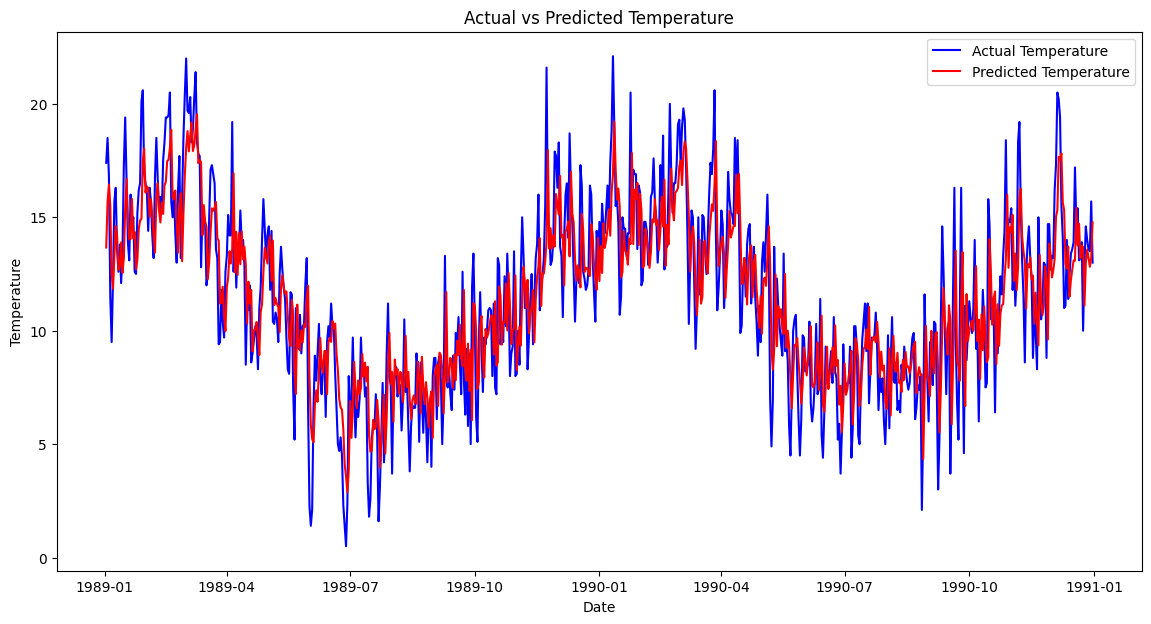

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

print(data.head())

def create_lagged_features(data, n_lags=3):
    df = data.copy()
    for i in range(1, n_lags + 1):
        df[f'lag_{i}'] = df['Temp'].shift(i)
    df = df.dropna()
    return df

data_lagged = create_lagged_features(data, n_lags=5)
print(data_lagged.head())

X = data_lagged[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data_lagged['Temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.2f}')

plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Temperature', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Temperature', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.show()
